In [135]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [136]:
# Load DataSet
filename='Project_survey.csv'
data=read_csv(filename)
data.head()

,Age,Gender,family_history,treatment
0,37.0,Female,No,Yes
1,44.0,M,No,No
2,32.0,Male,No,No
3,31.0,Male,Yes,Yes
4,31.0,Male,No,No


In [137]:
data.shape

(1259, 4)

In [138]:
data.dtypes

Age               float64
Gender             object
family_history     object
treatment          object
dtype: object

In [139]:
data.tail()

,Age,Gender,family_history,treatment
1254,26.0,male,No,Yes
1255,32.0,Male,Yes,Yes
1256,34.0,male,Yes,Yes
1257,46.0,f,No,No
1258,25.0,Male,Yes,Yes


In [140]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail","A little about you","p"]

In [141]:
for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='Male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='Female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='Trans', inplace=True)

In [142]:
data['Gender'].replace(['Female','Male','Trans'],[0,1,2],inplace=True)
data['family_history'].replace(['No','Yes'],[0,1],inplace=True)

In [143]:
data['Age']=data['Age'].fillna(0).astype(int)

In [144]:
data.head()

,Age,Gender,family_history,treatment
0,37,0,0,Yes
1,44,1,0,No
2,32,1,0,No
3,31,1,1,Yes
4,31,1,0,No


In [145]:
data.tail()

,Age,Gender,family_history,treatment
1254,26,1,0,Yes
1255,32,1,1,Yes
1256,34,1,1,Yes
1257,46,0,0,No
1258,25,1,1,Yes


In [146]:
data.dtypes

Age                int32
Gender             int64
family_history     int64
treatment         object
dtype: object

In [147]:
#Fitting the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [148]:
X=data.drop(columns='treatment')

In [149]:
X.head()

,Age,Gender,family_history
0,37,0,0
1,44,1,0
2,32,1,0
3,31,1,1
4,31,1,0


In [150]:
y=data.drop(columns=['Age','family_history','Gender'])

In [151]:
y.head()

,treatment
0,Yes
1,No
2,No
3,Yes
4,No


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [153]:
clf=DecisionTreeClassifier()

In [154]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [155]:
test=clf.predict(X_test)

In [156]:
test

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 

In [157]:
y_test

,treatment
1077,Yes
154,Yes
252,Yes
728,No
486,Yes
...,...
765,No
322,No
1185,No
215,Yes


In [158]:
from sklearn.metrics import accuracy_score
import joblib

In [159]:
accuracy=accuracy_score(y_test,test)

In [160]:
accuracy

0.6455026455026455

In [161]:
joblib.dump(clf,'Saved_model/model_project.joblib')

['Saved_model/model_project.joblib']

In [166]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [167]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[141,  56],
       [ 78, 103]], dtype=int64)

c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


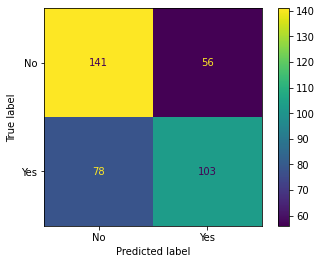

In [168]:
plot_confusion_matrix(clf, X_test, y_test)

In [169]:
y_test

,treatment
1077,Yes
154,Yes
252,Yes
728,No
486,Yes
...,...
765,No
322,No
1185,No
215,Yes


In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test))

              precision    recall  f1-score   support

          No       0.64      0.72      0.68       197
         Yes       0.65      0.57      0.61       181

    accuracy                           0.65       378
   macro avg       0.65      0.64      0.64       378
weighted avg       0.65      0.65      0.64       378

